In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip

--2022-08-10 16:38:50--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.36.168
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.36.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100929731 (96M) [application/zip]
Saving to: ‘8a95c26e1bab11eb.zip’

8a95c26e1bab11eb.zi 100%[===================>]  96.25M  17.8MB/s    in 6.4s    

2022-08-10 16:38:57 (15.0 MB/s) - ‘8a95c26e1bab11eb.zip’ saved [100929731/100929731]



In [ ]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/b70a166bfe.jpg  
  inflating: dataset/train/d31875b68e.jpg  
  inflating: dataset/train/22c66793fb.jpg  
  inflating: dataset/train/a468b1390f.jpg  
  inflating: dataset/train/9e43d2cedc.jpg  
  inflating: dataset/train/2e0299e991.jpg  
  inflating: dataset/train/e0b85d8ff1.jpg  
  inflating: dataset/train/6a651ec04a.jpg  
  inflating: dataset/train/46c87716a5.jpg  
  inflating: dataset/train/8c40d4f073.jpg  
  inflating: dataset/train/96e4fb744c.jpg  
  inflating: dataset/train/794a698960.jpg  
  inflating: dataset/train/dad1934f35.jpg  
  inflating: dataset/train/a1c66a2b3c.jpg  
  inflating: dataset/train/b62484a8e4.jpg  
  inflating: dataset/train/09462814f1.jpg  
  inflating: dataset/train/97dbdb4dd0.jpg  
  inflating: dataset/train/3bd7f56164.jpg  
  inflating: dataset/train/a2576a2fa1.jpg  
  inflating: dataset/train/f462f66aa6.jpg  
  inflating: dataset/train/740e1a7fca.jpg  
  inflating: dataset/trai

**LOADING & SPLITTING DATA**

In [ ]:
train_df = pd.read_csv('/content/dataset/train.csv')

In [ ]:
train_df.head()

,filename,class
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [ ]:
train = train_df.sample(frac = 0.9)
val = train_df.drop(train.index)


In [ ]:
train.head()

,filename,class
1126,c78a966afe,crotalus-atrox
4743,ebdc6c81f8,thamnophis-radix
4105,6b1f867b3f,crotalus-atrox
2068,a727a4e8a0,diadophis-punctatus
4382,08ffd44800,pantherophis-spiloides


In [ ]:
train.shape

(4957, 2)

In [ ]:
train_df.columns = ['filename','class']
train_df.head()

,filename,class
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [ ]:
val.head()

,filename,class
8,4fd6a5e5fa,crotalus-horridus
22,f59da20c0e,agkistrodon-piscivorus
34,7add42e9aa,pantherophis-obsoletus
53,7a1b943d90,crotalus-atrox
91,e2e09e399b,pantherophis-alleghaniensis


In [ ]:
train['filename'] = '/content/dataset/train/' + train['filename'] + '.jpg'
train.head()

,filename,class
1126,/content/dataset/train/c78a966afe.jpg,crotalus-atrox
4743,/content/dataset/train/ebdc6c81f8.jpg,thamnophis-radix
4105,/content/dataset/train/6b1f867b3f.jpg,crotalus-atrox
2068,/content/dataset/train/a727a4e8a0.jpg,diadophis-punctatus
4382,/content/dataset/train/08ffd44800.jpg,pantherophis-spiloides


In [ ]:
val['filename'] = '/content/dataset/train/' + val['filename'] + '.jpg'
val.head()

,filename,class
8,/content/dataset/train/4fd6a5e5fa.jpg,crotalus-horridus
22,/content/dataset/train/f59da20c0e.jpg,agkistrodon-piscivorus
34,/content/dataset/train/7add42e9aa.jpg,pantherophis-obsoletus
53,/content/dataset/train/7a1b943d90.jpg,crotalus-atrox
91,/content/dataset/train/e2e09e399b.jpg,pantherophis-alleghaniensis


In [ ]:
train.shape

(4957, 2)

In [ ]:
unique_features = train['class'].unique()
len(unique_features)

35

Task 2: Display random 16 images from training set

In [ ]:
sample_df = train.sample(16)
files = sample_df['filename'].tolist()
targets = sample_df['class'].tolist()

In [ ]:
files

['/content/dataset/train/5f5621802f.jpg',
 '/content/dataset/train/8bf6cc0d0b.jpg',
 '/content/dataset/train/ce75659cd1.jpg',
 '/content/dataset/train/b3db23922c.jpg',
 '/content/dataset/train/fef2e5b9d6.jpg',
 '/content/dataset/train/f3f4ccdd66.jpg',
 '/content/dataset/train/2af24b7183.jpg',
 '/content/dataset/train/570d5c7e6a.jpg',
 '/content/dataset/train/1a0644d99d.jpg',
 '/content/dataset/train/7e63405c88.jpg',
 '/content/dataset/train/828e912d54.jpg',
 '/content/dataset/train/0365e19251.jpg',
 '/content/dataset/train/0750de37d3.jpg',
 '/content/dataset/train/f1a5aa3c91.jpg',
 '/content/dataset/train/190388a845.jpg',
 '/content/dataset/train/1e36aeda70.jpg']

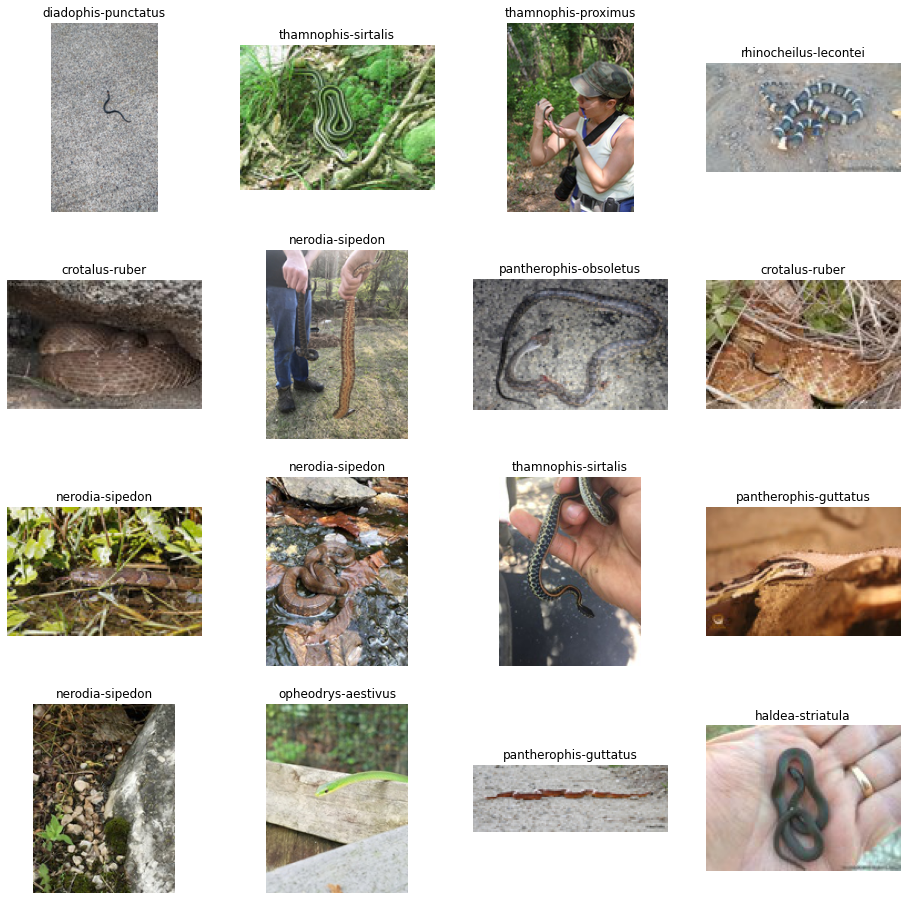

In [ ]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(nrows * 4,nrows * 4)

for i, (img_path, targets) in enumerate(zip(files,targets)):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(targets)

plt.show()

**TRAIN & VALIDATION IMAGE GENERATOR**

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory='/content/dataset/train',
    target_size=(256,256),
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory='/content/dataset/train',
    target_size=(256,256),
    class_mode='categorical'
)

Found 4957 validated image filenames belonging to 35 classes.
Found 551 validated image filenames belonging to 35 classes.


**CNN MODEL BUILDING**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(unique_features), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Task 6: Create custom callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.80):
            print("\nReached 80% accuracy -> training stopped")
            self.model.stop_training = True
        
callbacks = myCallback()


In [ ]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator,callbacks=[callbacks])

Epoch 1/20
155/155 [==============================] - 82s 453ms/step - loss: 3.9087 - accuracy: 0.0811 - val_loss: 3.4152 - val_accuracy: 0.0998
Epoch 2/20
155/155 [==============================] - 70s 455ms/step - loss: 3.4087 - accuracy: 0.0938 - val_loss: 3.3817 - val_accuracy: 0.1053
Epoch 3/20
155/155 [==============================] - 70s 450ms/step - loss: 3.3954 - accuracy: 0.0849 - val_loss: 3.3557 - val_accuracy: 0.0998
Epoch 4/20
155/155 [==============================] - 71s 455ms/step - loss: 3.3903 - accuracy: 0.0878 - val_loss: 3.3487 - val_accuracy: 0.1089
Epoch 5/20
155/155 [==============================] - 70s 450ms/step - loss: 3.3790 - accuracy: 0.0942 - val_loss: 3.3288 - val_accuracy: 0.1107
Epoch 6/20
155/155 [==============================] - 71s 455ms/step - loss: 3.3630 - accuracy: 0.0972 - val_loss: 3.3305 - val_accuracy: 0.1162
Epoch 7/20
155/155 [==============================] - 70s 450ms/step - loss: 3.3589 - accuracy: 0.0930 - val_loss: 3.3201 - val_ac

Task 7: Evaluate the validation set, compute F1 score and build confusion matrix

In [ ]:
model.evaluate(val_generator)

18/18 [==============================] - 1s 56ms/step - loss: 3.2322 - accuracy: 0.1397


[3.2321836948394775, 0.13974592089653015]

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

prob = model.predict(val_generator)
pred = np.argmax(prob, axis=1)

In [ ]:
print(confusion_matrix(val_generator.classes, pred))

[[ 0  0  0 ...  0  0 14]
 [ 0  0  0 ...  0  0  5]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0  9]
 [ 0  0  0 ...  0  0  5]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
print("F-1 Score=", np.round(f1_score(val_generator.classes, pred, average='weighted'), 3))

F-1 Score= 0.038


Task 8: Visualize the effect of CNN layers on an image

(256, 256, 3)
(1, 256, 256, 3)
(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 64)
(1, 62, 62, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


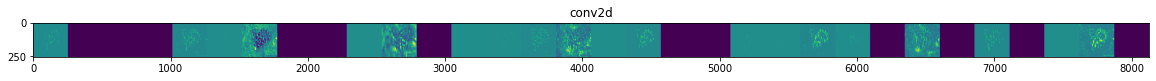

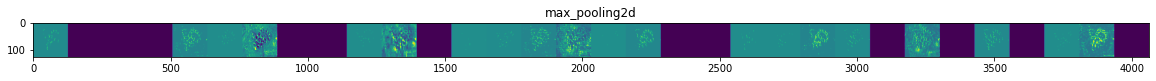

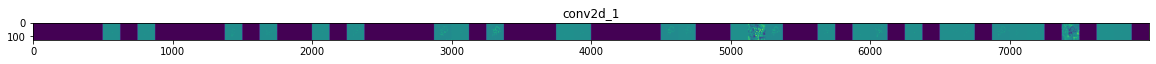

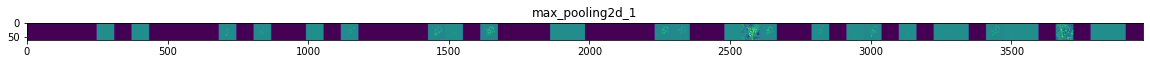

In [ ]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = tf.keras.preprocessing.image.load_img(files[3], target_size=(256, 256) )
x=tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x=x.reshape ((1, ) + x.shape)
print (x.shape)
x/=255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len (feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    print(feature_map.shape)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x= feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype ('uint8')
      display_grid[:, i*size : (i + 1) * size] = x
    scale =20. /n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Task 9: Display 10 random images with actual and predicted breed from validation set

In [ ]:
labels = dict((v,k) for k,v in train_generator.class_indices.items())
labels

{0: 'agkistrodon-contortrix',
 1: 'agkistrodon-piscivorus',
 2: 'coluber-constrictor',
 3: 'crotalus-atrox',
 4: 'crotalus-horridus',
 5: 'crotalus-ruber',
 6: 'crotalus-scutulatus',
 7: 'crotalus-viridis',
 8: 'diadophis-punctatus',
 9: 'haldea-striatula',
 10: 'heterodon-platirhinos',
 11: 'lampropeltis-californiae',
 12: 'lampropeltis-triangulum',
 13: 'masticophis-flagellum',
 14: 'natrix-natrix',
 15: 'nerodia-erythrogaster',
 16: 'nerodia-fasciata',
 17: 'nerodia-rhombifer',
 18: 'nerodia-sipedon',
 19: 'opheodrys-aestivus',
 20: 'pantherophis-alleghaniensis',
 21: 'pantherophis-emoryi',
 22: 'pantherophis-guttatus',
 23: 'pantherophis-obsoletus',
 24: 'pantherophis-spiloides',
 25: 'pantherophis-vulpinus',
 26: 'pituophis-catenifer',
 27: 'rhinocheilus-lecontei',
 28: 'storeria-dekayi',
 29: 'storeria-occipitomaculata',
 30: 'thamnophis-elegans',
 31: 'thamnophis-marcianus',
 32: 'thamnophis-proximus',
 33: 'thamnophis-radix',
 34: 'thamnophis-sirtalis'}

In [ ]:
pred_labels = [] 
actuals = []
pred = np.argmax(model.predict(val_generator), axis=1)
for i in range(551):
    pred_labels.append(labels[pred[i]])
    actuals.append(labels[val_generator.classes[i]])


In [ ]:
val_df = pd.DataFrame(columns=['file', 'pred_labels', 'actuals'])
val_df['file'] = val_generator.filenames
val_df['pred_labels'] = pred_labels
val_df['actuals'] = actuals
val_df.head()

,file,pred_labels,actuals
0,/content/dataset/train/4fd6a5e5fa.jpg,thamnophis-sirtalis,crotalus-horridus
1,/content/dataset/train/f59da20c0e.jpg,thamnophis-sirtalis,agkistrodon-piscivorus
2,/content/dataset/train/7add42e9aa.jpg,thamnophis-sirtalis,pantherophis-obsoletus
3,/content/dataset/train/7a1b943d90.jpg,thamnophis-sirtalis,crotalus-atrox
4,/content/dataset/train/e2e09e399b.jpg,crotalus-atrox,pantherophis-alleghaniensis


In [ ]:
sample = pd.DataFrame(val_df.sample(10))


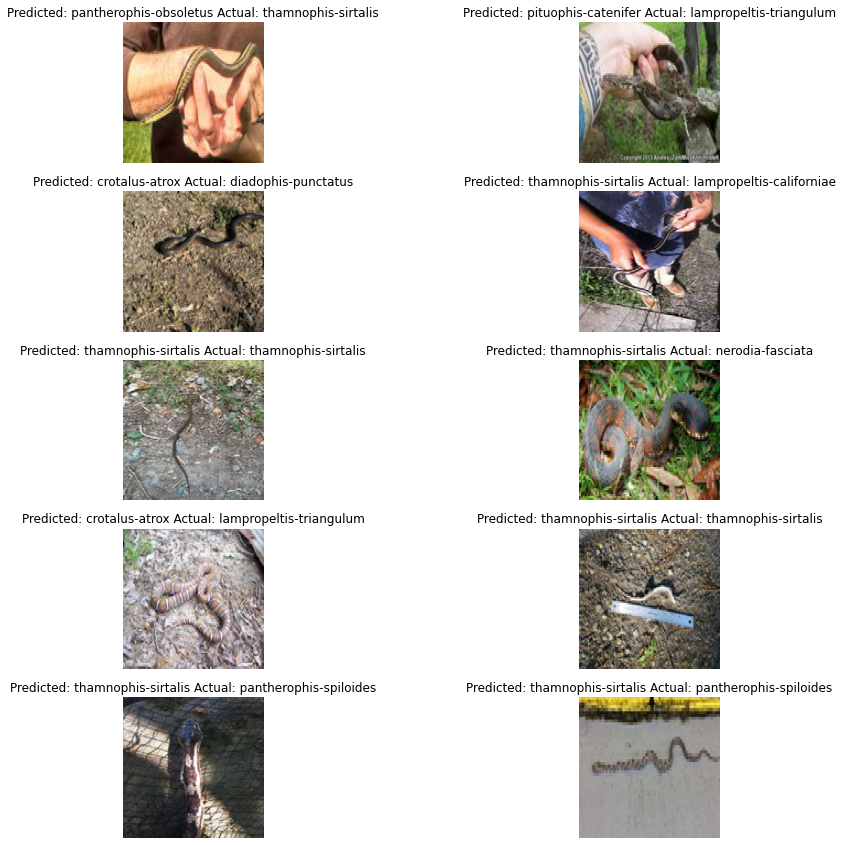

In [ ]:
j=1
plt.figure(figsize=(15,15))
for i in sample.index:

  plt.subplot(5, 2, j)
  img = tf.keras.preprocessing.image.load_img(sample['file'][i], target_size = (256, 256))
  plt.imshow(img)
  plt.axis("off")
  plt.title("Predicted: " + val_df['pred_labels'][i] + " Actual: " + val_df['actuals'][i])
  j+=1